In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

fb = pd.read_csv("C:\\Users\\rehan\\Desktop\\ML Project\\facebook-fact-check.csv")
fb

,account_id,post_id,Category,Page,Post URL,Date Published,Post Type,Rating,Debate,share_count,reaction_count,comment_count
0,1.840970e+14,1.035060e+15,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,19-09-2016,video,no factual content,NaN,NaN,146.0,15.0
1,1.840970e+14,1.035270e+15,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,19-09-2016,link,mostly true,NaN,1.0,33.0,34.0
2,1.840970e+14,1.035310e+15,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,19-09-2016,link,mostly true,NaN,34.0,63.0,27.0
3,1.840970e+14,1.035320e+15,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,19-09-2016,link,mostly true,NaN,35.0,170.0,86.0
4,1.840970e+14,1.035350e+15,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,19-09-2016,video,mostly true,NaN,568.0,3188.0,2815.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2277,1.145180e+14,1.472390e+15,left,The Other 98%,https://www.facebook.com/TheOther98/posts/1472...,27-09-2016,photo,no factual content,NaN,21563.0,33388.0,391.0
2278,1.145180e+14,1.472420e+15,left,The Other 98%,https://www.facebook.com/TheOther98/posts/1472...,27-09-2016,link,mostly true,NaN,1451.0,4828.0,342.0
2279,1.145180e+14,1.472550e+15,left,The Other 98%,https://www.facebook.com/TheOther98/posts/1472...,27-09-2016,link,mixture of true and false,NaN,8236.0,12083.0,856.0
2280,1.145180e+14,1.472560e+15,left,The Other 98%,https://www.facebook.com/TheOther98/posts/1472...,27-09-2016,link,mostly true,yes,3985.0,12966.0,538.0


In [16]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   account_id      2282 non-null   float64
 1   post_id         2282 non-null   float64
 2   Category        2282 non-null   object 
 3   Page            2282 non-null   object 
 4   Post URL        2282 non-null   object 
 5   Date Published  2282 non-null   object 
 6   Post Type       2282 non-null   object 
 7   Rating          2282 non-null   object 
 8   Debate          298 non-null    object 
 9   share_count     2212 non-null   float64
 10  reaction_count  2280 non-null   float64
 11  comment_count   2280 non-null   float64
dtypes: float64(5), object(7)
memory usage: 214.1+ KB


In [17]:
# Better to drop debate as it only has 298 non null objects out of 2282 total records which is around 13 percent, so 87 percent of values are null
fb['Debate'] = fb['Debate'].fillna(value='no')

# Dropping the rest of the NaN values
fb = fb.dropna()

In [18]:
fb.dtypes

account_id        float64
post_id           float64
Category           object
Page               object
Post URL           object
Date Published     object
Post Type          object
Rating             object
Debate             object
share_count       float64
reaction_count    float64
comment_count     float64
dtype: object

In [19]:
# Giving string values numerical values by using pd.Categorical().codes

cols_to_change = []
for i in fb.columns:
    if i == 'share_count':
        break
    cols_to_change.append(i)
    
for i in cols_to_change:
    fb.loc[:, i] = pd.Categorical(fb.loc[:, i]).codes

C:\Users\rehan\AppData\Local\Temp\ipykernel_28116\3141326510.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb.loc[:, i] = pd.Categorical(fb.loc[:, i]).codes


In [20]:
# Converted dataset
fb

,account_id,post_id,Category,Page,Post URL,Date Published,Post Type,Rating,Debate,share_count,reaction_count,comment_count
1,4,119,1,0,0,0,0,2,0,1.0,33.0,34.0
2,4,120,1,0,1,0,0,2,0,34.0,63.0,27.0
3,4,121,1,0,2,0,0,2,0,35.0,170.0,86.0
4,4,122,1,0,3,0,3,2,0,568.0,3188.0,2815.0
5,4,123,1,0,4,0,0,2,0,23.0,28.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2277,1,1048,0,8,990,6,1,3,0,21563.0,33388.0,391.0
2278,1,1049,0,8,991,6,0,2,0,1451.0,4828.0,342.0
2279,1,1050,0,8,992,6,0,0,0,8236.0,12083.0,856.0
2280,1,1051,0,8,993,6,0,2,1,3985.0,12966.0,538.0


In [21]:
# Dividing fb into X and Y datasets

X_cols = []
for i in fb.columns:
    X_cols.append(i)
X_cols.remove('Rating')
    
X = fb[X_cols]
Y = fb['Rating']

In [22]:
# We can observe that the Rating (Y dataset) has 4 unique class labels

fb.Rating.unique()

array([2, 3, 0, 1], dtype=int8)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=44)

0.7951807228915663


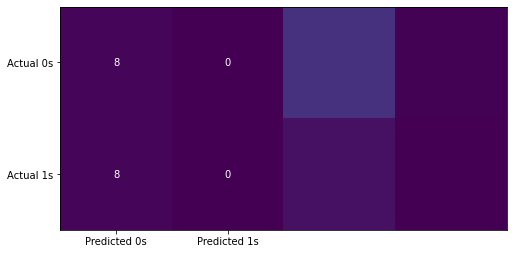

In [54]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import kneighbors_graph
knn = KNeighborsClassifier(n_neighbors=4)  
knn.fit(X, Y)
knn.predict(X_test)
print(knn.score(X_test, Y_test))

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [51]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
reg = LogisticRegression(max_iter = 10000)
reg.fit(X_train, Y_train)
y_pred = reg.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print(accuracy)

0.7063253012048193


In [61]:
print(X_cols)

['account_id', 'post_id', 'Category', 'Page', 'Post URL', 'Date Published', 'Post Type', 'Debate', 'share_count', 'reaction_count', 'comment_count']


0.6626506024096386


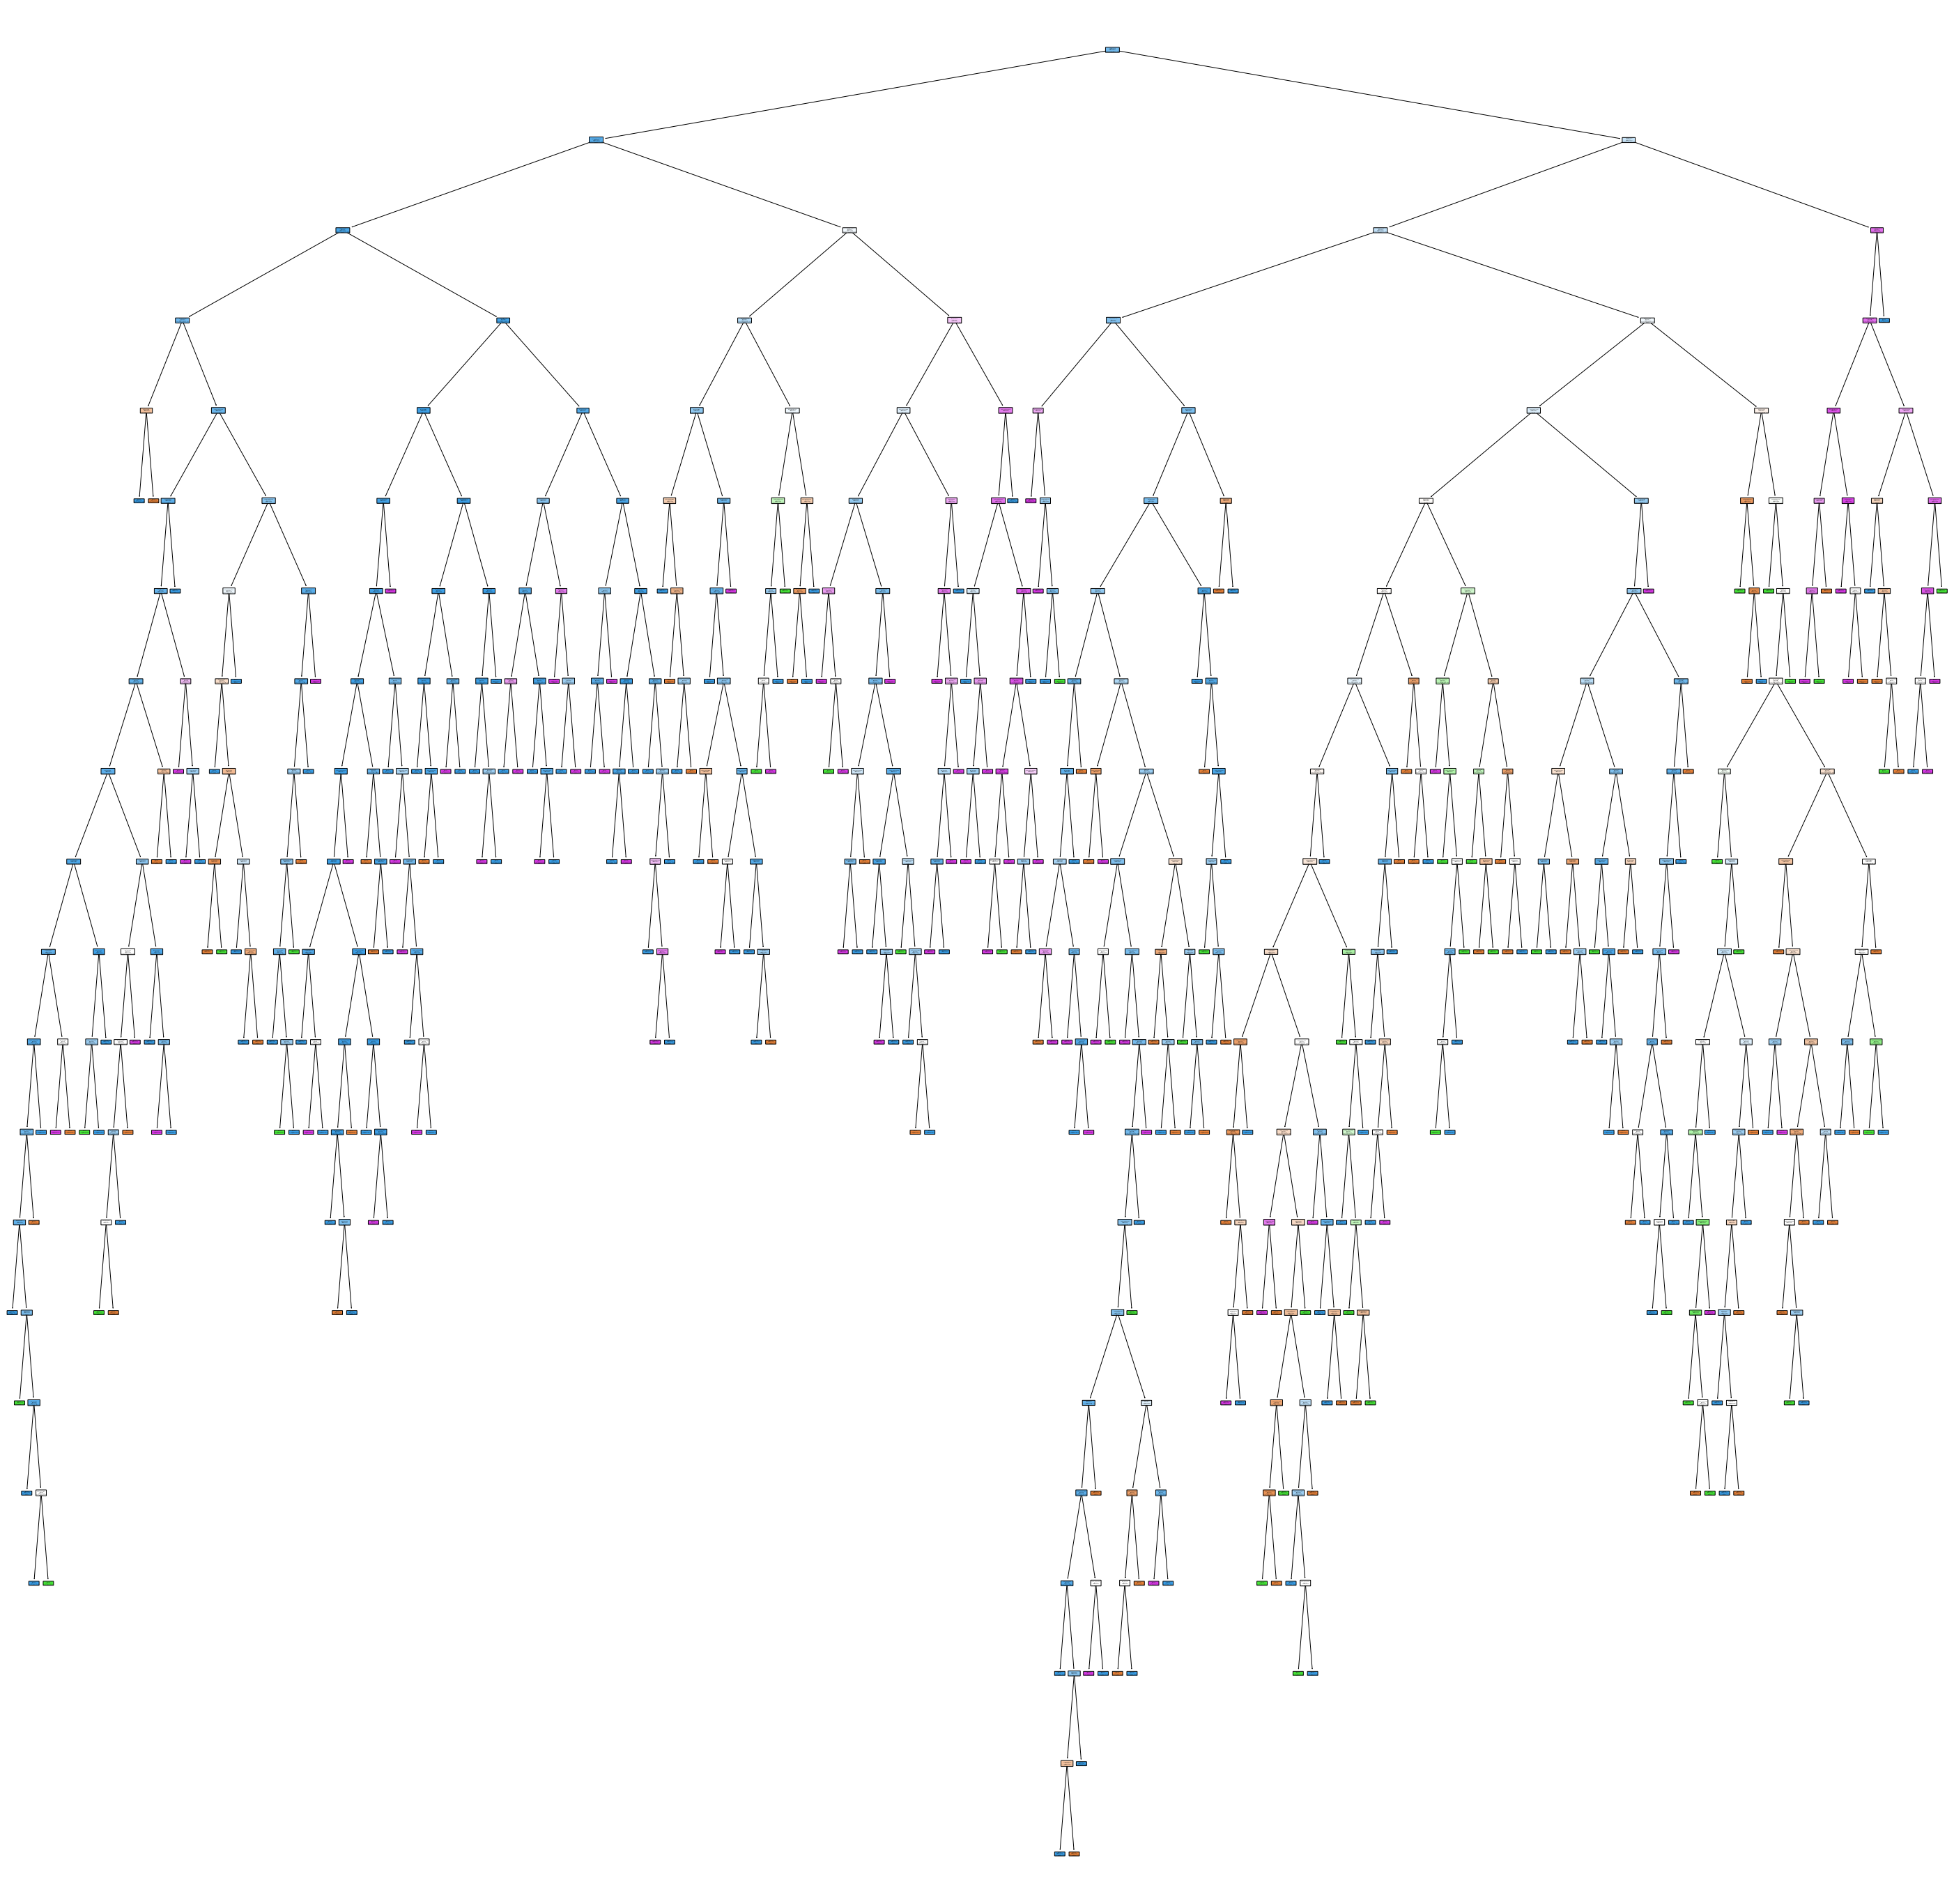

In [68]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print(accuracy)

features = ['account_id', 'post_id', 'Category', 'Page', 'Post URL', 'Date Published', 'Post Type', 'Rating', 'Debate', 'share_count', 'reaction_count', 'comment_count']
classes = ['a','b','c','d']

plt.figure(figsize=(50, 50))
plot_tree(dtc,
          feature_names=features,
          class_names=classes,
          rounded=True, # Rounded node edges
          filled=True, # Adds color according to class
          proportion=True);

In [30]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print(accuracy)

0.7304216867469879


In [70]:
# SVM

from sklearn.svm import SVC
model = SVC()
model.fit(X_train, Y_train)
y_pred = svc.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print(accuracy)

0.7274096385542169


In [34]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
y_pred = gnb.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print(accuracy)

0.6852409638554217
